# Homework on Simulation

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


---

## Tools for plotting


In [2]:
sns.set()
def scatterplot(A,B):
    plt.scatter(A, B)
    plt.title("Scatterplot of randomly generated numbers")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def densityplot(A, B = None):
    sns.kdeplot(A)
    if B is not None:
        sns.kdeplot(B)
        plt.title("Density function of randomly generated numbers")
        plt.show()

def barplot(A):
    S = set(A)
    temp = [sum([A[i] == j for i in range(len(A))]) for j in S]
    temp = [temp[i]/sum(temp) for i in range(len(temp))]
    plt.bar([str(i) for i in S], temp)
    plt.title("Barplot of randomly generated numbers/categories")
    plt.show()



## Linear Congruential Generators (LCG)

Let $A,B,M$ be integers, and we denote the seed $x_0$ with $x_0<M$. The LCG algorithm is defined by the recurrence relation: 
$$x_{n+1}=(Ax_n+B) \mod{M}.$$
In the below code, we choose the seed $x_0$ to be the microsecond at point we run the program, and
\begin{align*}
&A = 7^5\\
&B = 0\\
&M = 2^{31}-1
\end{align*}

**Remark:** Because the seed $x_0$ is taken as the microsecond, the value $x_0/M$ is still very small, 
thus we opt to exclude the seed from our list of random numbers.

In [3]:
_M = 2**31 - 1
_A = 7**5
_B = 0

def LCG(m):
    seed = datetime.now().microsecond
    x1 = _A*seed % _M

    seq = [x1]
    
    for _ in range(m):
        x1 = (_A*x1 + _B)% _M
        seq.append(x1)
    return [seq[i]/_M for i in range(0,m)]


LCG(1)

[0.8052080775635354]

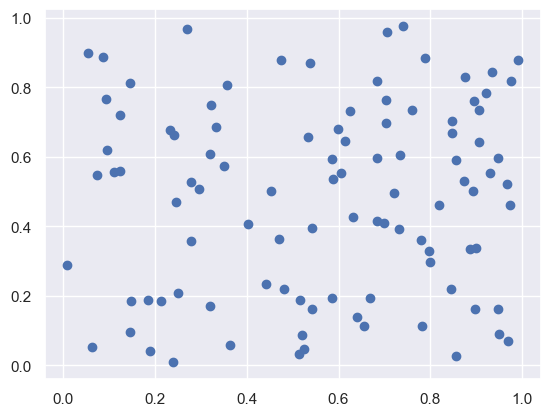

In [4]:
A = LCG(100)
B = LCG(100)
plt.scatter(A,B)


<Axes: ylabel='Density'>

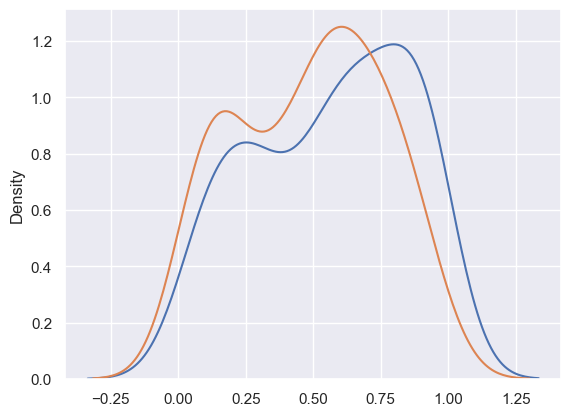

In [6]:
sns.kdeplot(A)
sns.kdeplot(B)

---

## Bernoulli Distribution

A random variable $X$ is said to have a Bernoulli distribution with parameter $p\in(0,1)$ provided that
$$
X=
\begin{cases}
1, &\text{with probability }p\\
0, &\text{with probability }1-p
\end{cases}
$$
and we denote $X\sim\mathcal{B}(p)$. 
Below, the function `Bernoulli(m,p)` generates `m` independent and identically Bernoulli trials 
with the same parameter `p`.

In [ ]:
def Bernoulli(m, p):
    sample = LCG(m)
    return [1 if sample[i]<=p else 0 for i in range(m)]

m,p = 100, 0.7
S = Bernoulli(m,p)
Mean = sum(S)/m
Mean


---

## Binomial Distribution

From Wiki
> The binomial distribution with parameters $n$ and $p$ is the discrete probability 
distribution of the number of successes in a sequence of $n$ independent experiments.

Here, we define the function `Binomial(m,n,p)`, which returns a list of length `m`,
each entry represent the number of successes in `n` iid Bernoulli trials.

**Explanation:** There are `m` experiments. In each experiment, we toss an (unfair) coin 
with probability of success $p$, and we count the number of success.

In [ ]:
def Binomial(m, n, p):
    result = []
    L = Bernoulli(n*m, p)

    for i in range(m):
        success = sum([ L[j] for j in range(n*i, n*(i+1)) ])
        result.append(success)
    return result

Binomial(3, 10, 0.6)

---

## Geometric Distribution

The geometric distribution models the number of trials that must be run in order to achieve success.
Below, the function `Geometric(m,p)` performs `m` experiments of Geometric distribution test.


In [ ]:
def Geometric(m, p):
    sample = []
    seed = datetime.now().microsecond

    for _ in range(m):
        seed = (_A*seed)%_M
        toss = 1
        while seed>p*_M:
            seed = (_A*seed+_B)%_M
            toss += 1
        sample.append(toss)

    return sample



Geometric(10, 0.7)


---

## Multinomial Distribution

From wikipedia:
>  it models the probability of counts for each side of a k-sided die rolled n times.
> For n independent trials each of which leads to a success for exactly one of k categories,
> with each category having a given fixed success probability, the multinomial distribution
> gives the probability of any particular combination of numbers of successes for the various categories.



In [ ]:
def Multinom(m: int, x: list, p: list):
    U = LCG(m)
    K = len(x)
    result = []
    
    p_cum = [p[0]]
    for i in range(1, K):
        p_cum.append(p[i]+p_cum[-1])

    for i in range(m):
        j = 0
        while U[i]>p_cum[j]:
            j += 1
        result.append(x[j])
    return result
